In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate, train_test_split, RandomizedSearchCV

from utils.images import Images

# 1. Aquisição dos dados

In [2]:
path_metadata = '../../Metadata/'
path_images = "../../VarroaDataset/"

In [3]:
metadata = pd.read_csv(path_metadata+'metadataVarroa.csv')
metadata['image'] = metadata['image'].apply(lambda x: path_images+x)
metadata.head()

,image,label
0,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
1,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
2,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
3,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
4,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0


In [4]:
imgs_saudavel = metadata[metadata['label'] == 0]
imgs_saudavel.index = [i for i in range(len(imgs_saudavel))]
imgs_saudavel

,image,label
0,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
1,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
2,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
3,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
4,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
...,...,...
9557,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,0
9558,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,0
9559,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,0
9560,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,0


In [5]:
imgs_infectada = metadata[metadata['label'] == 1]
imgs_infectada.index = [i for i in range(len(imgs_infectada))]
imgs_infectada

,image,label
0,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
1,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
2,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
3,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
4,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,1
...,...,...
3942,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,1
3943,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,1
3944,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,1
3945,../../VarroaDataset/2017-10-17_16-41-10.mp4-be...,1


In [6]:
imgs_selected = pd.concat([imgs_saudavel.loc[:2999], imgs_infectada.loc[:2999]])
imgs_selected.sort_values(by='label', inplace=True)
imgs_selected.index = [i for i in range(len(imgs_selected))]
imgs_selected.head()

,image,label
0,../../VarroaDataset/2017-08-28_09-30-00-1_500_...,0
1,../../VarroaDataset/2017-08-30_15-42-59.mp4-be...,0
2,../../VarroaDataset/2017-08-30_15-42-59.mp4-be...,0
3,../../VarroaDataset/2017-08-30_15-42-59.mp4-be...,0
4,../../VarroaDataset/2017-08-30_15-42-59.mp4-be...,0


In [7]:
imgs_selected['label'].value_counts()

0    3000
1    3000
Name: label, dtype: int64

In [8]:
imgs = Images(imgs_selected)

6000 imagens carregadas
3000 infectadas
3000 saudáveis


# 2 Pré-processamento

2.1 - Normalização

In [9]:
imgs.normalize()

  0%|          | 0/6000 [00:00<?, ?it/s]

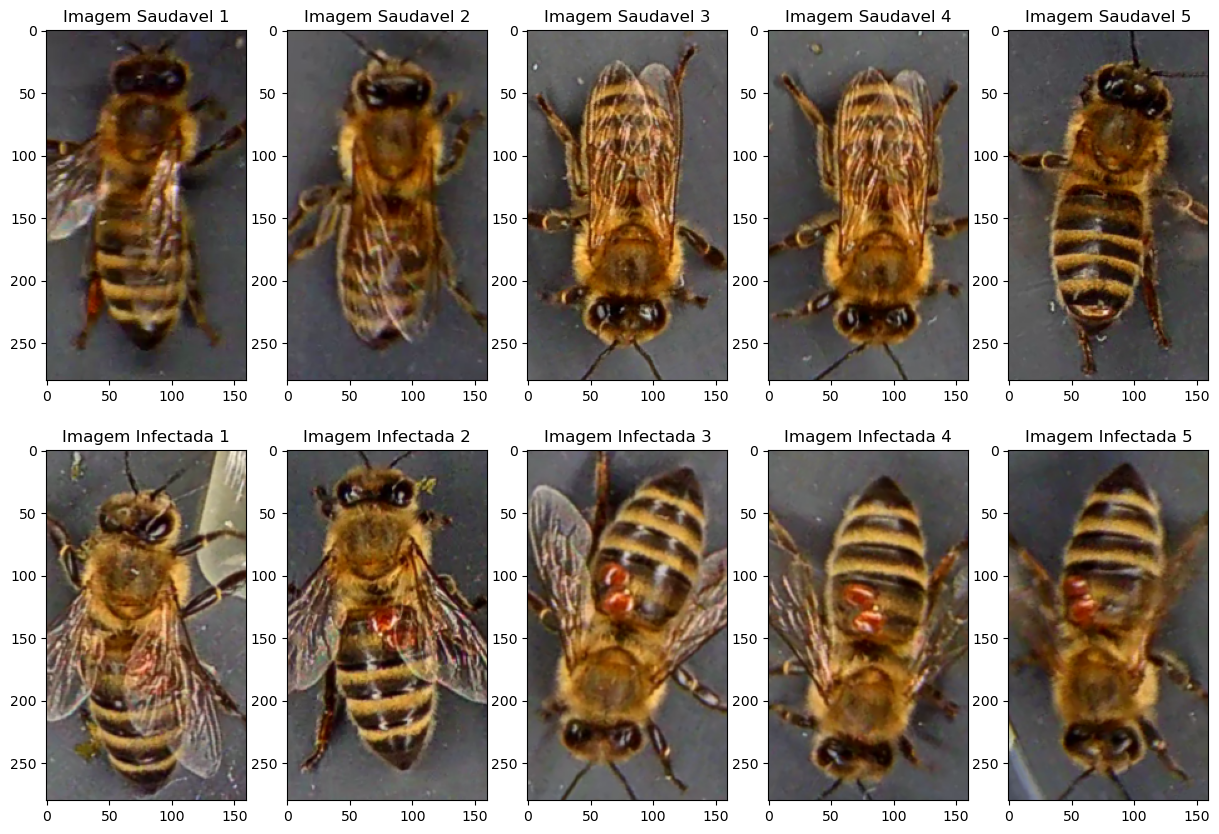

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
for j in range(5):
    ax[0, j].imshow(imgs.imgs_normalized[j+1])
    ax[0, j].set_title(f'Imagem Saudavel {j+1}')
    ax[1, j].imshow(imgs.imgs_normalized[j+3500])
    ax[1, j].set_title(f'Imagem Infectada {j+1}')

2.2 - Equalização do histograma

In [10]:
imgs.equalize()

  0%|          | 0/6000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Imagem Equalizada B')

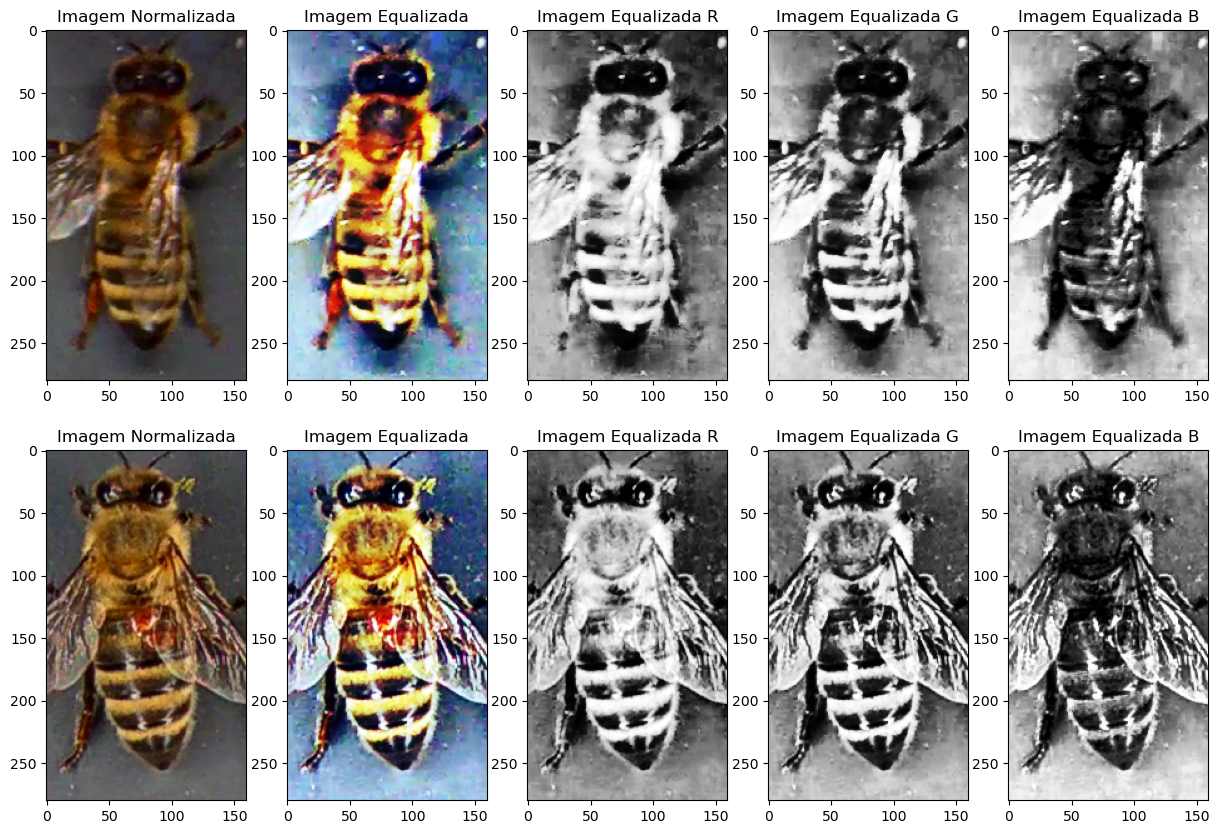

In [14]:
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
ax[0, 0].imshow(imgs.imgs_normalized[1])
ax[0, 0].set_title('Imagem Normalizada')
ax[0, 1].imshow(imgs.imgs_equalized[1])
ax[0, 1].set_title('Imagem Equalizada')
ax[0, 2].imshow(imgs.imgs_equalized[1][:, :, 0], cmap='gray')
ax[0, 2].set_title('Imagem Equalizada R')
ax[0, 3].imshow(imgs.imgs_equalized[1][:, :, 1], cmap='gray')
ax[0, 3].set_title('Imagem Equalizada G')
ax[0, 4].imshow(imgs.imgs_equalized[1][:, :, 2], cmap='gray')
ax[0, 4].set_title('Imagem Equalizada B')

ax[1, 0].imshow(imgs.imgs_normalized[3501])
ax[1, 0].set_title('Imagem Normalizada')
ax[1, 1].imshow(imgs.imgs_equalized[3501])
ax[1, 1].set_title('Imagem Equalizada')
ax[1, 2].imshow(imgs.imgs_equalized[3501][:, :, 0], cmap='gray')
ax[1, 2].set_title('Imagem Equalizada R')
ax[1, 3].imshow(imgs.imgs_equalized[3501][:, :, 1], cmap='gray')
ax[1, 3].set_title('Imagem Equalizada G')
ax[1, 4].imshow(imgs.imgs_equalized[3501][:, :, 2], cmap='gray')
ax[1, 4].set_title('Imagem Equalizada B')

2.3 Segmentação

In [11]:
imgs.segment()

  0%|          | 0/6000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Imagem Segmentada')

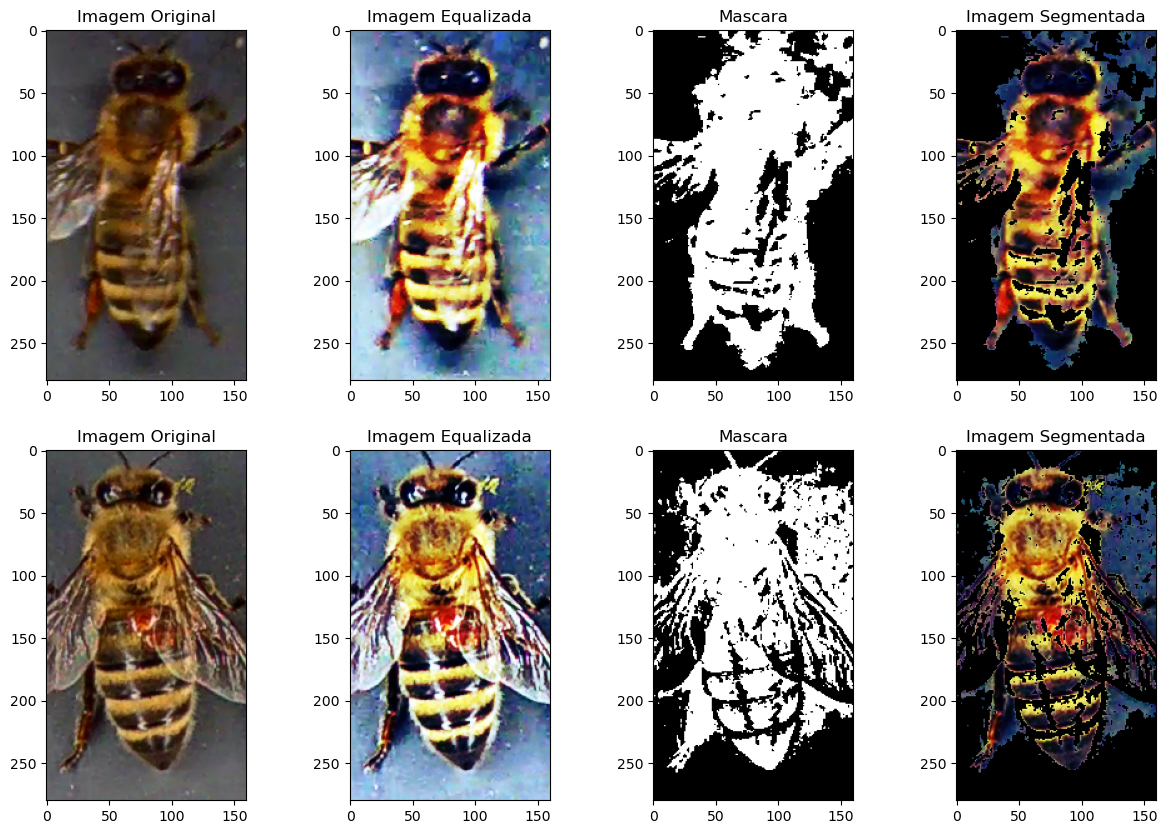

In [16]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
ax[0, 0].imshow(imgs.imgs_normalized[1])
ax[0, 0].set_title('Imagem Original')
ax[0, 1].imshow(imgs.imgs_equalized[1])
ax[0, 1].set_title('Imagem Equalizada')
ax[0, 2].imshow(imgs.masks[1], cmap='gray')
ax[0, 2].set_title('Mascara')
ax[0, 3].imshow(imgs.imgs_segmented[1])
ax[0, 3].set_title('Imagem Segmentada')

ax[1, 0].imshow(imgs.imgs_normalized[3501])
ax[1, 0].set_title('Imagem Original')
ax[1, 1].imshow(imgs.imgs_equalized[3501])
ax[1, 1].set_title('Imagem Equalizada')
ax[1, 2].imshow(imgs.masks[3501], cmap='gray')
ax[1, 2].set_title('Mascara')
ax[1, 3].imshow(imgs.imgs_segmented[3501])
ax[1, 3].set_title('Imagem Segmentada')

# 3 Extração de Características

### 3.1 GLCM

Imagem Segmentada

In [12]:
imgs.extraction(descritor='GLCM', op=1)

  0%|          | 0/6000 [00:00<?, ?it/s]

In [13]:
imgs.feats['GLCM_segmented'].shape

(6000, 18)

Imagem Equalizada

In [14]:
imgs.extraction(descritor='GLCM', op=2)

  0%|          | 0/6000 [00:00<?, ?it/s]

In [15]:
imgs.feats['GLCM_equalized'].shape

(6000, 18)

### HOG

Imagem Segmentada

In [16]:
imgs.extraction(descritor='HOG', op=1)

  0%|          | 0/6000 [00:00<?, ?it/s]

In [17]:
imgs.feats['HOG_segmented'].shape

(6000, 18)

Imagem Equalizada

In [18]:
imgs.extraction(descritor='HOG', op=2)

  0%|          | 0/6000 [00:00<?, ?it/s]

In [19]:
imgs.feats['HOG_equalized'].shape

(6000, 18)

# 4 Classificação

In [12]:
def parameter_estimator(clf, params, x_train, x_test):
    n_iter_search = 10
    random_search = RandomizedSearchCV(clf, param_distributions=params,
                    n_iter=n_iter_search,scoring='accuracy', cv=5, n_jobs=-1)
    random_search.fit(x_train, x_test)
    return random_search.best_params_

In [13]:
def media_cv(scores):
    del scores['fit_time']
    del scores['score_time']
    scores_mean = {i: f'{scores[i].mean():.2f} +/-({scores[i].std():.3f})' for i in scores.keys()}
    return scores_mean

In [14]:
def cross_validation(clf,k, x, y):
    metrics = ['accuracy', 'precision', 'recall', 'f1']
    scores = cross_validate(clf, x, y, cv=k, scoring=metrics, n_jobs=-1)
    result = media_cv(scores)
    return result

In [15]:
clfs = [
    LGBMClassifier(),
    RandomForestClassifier(),
    MLPClassifier()
]

In [16]:
params = {
    'LGBM':{
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 500, 700],
        'num_leaves': [10, 20, 30, 40, 50],
        'max_depth': [3, 5, 7, 9, 11, 13],
        },
    'RF':{
        'n_estimators': [100, 200, 300, 400, 500, 700],
        'max_depth': [3, 5, 7, 9, 11, 13],
        'min_samples_split': [2, 5, 10, 15, 100],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2'],
        },
    'MLP': {'hidden_layer_sizes': [(10,), (50,), (100,)],
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['sgd', 'adam'],
              'learning_rate': ['constant', 'adaptive']
            }
}

In [17]:
results = {}

In [18]:
def run_test(feats, labels, k):
    result = {}
    X_train, X_test, y_train, y_test = train_test_split(feats, labels, test_size=0.2, random_state=42)
    for clf, pr in zip(clfs, params.keys()):
        print('-'*50)
        print(f'Running {pr}...')
        print('-'*50)
        print('Best params')
        best_params = parameter_estimator(clf, params[pr], X_train, y_train)
        clf.set_params(**best_params)
        print(best_params)
        print('-'*50)
        print('Running k-fold...')
        result[f'{pr}'] = cross_validation(clf, k , feats, labels)
        print('Done!')
        print('-'*50)
        print("")

    return result
    

### 4.1 - GLCM imgs com segmentação

In [19]:
%%time
results['glcm_segmented'] = run_test(imgs.feats['GLCM_segmented'], imgs.labels, 15)

--------------------------------------------------
Running LGBM...
--------------------------------------------------
Best params
{'num_leaves': 20, 'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.1}
--------------------------------------------------
Running k-fold...
Done!
--------------------------------------------------

--------------------------------------------------
Running RF...
--------------------------------------------------
Best params
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 11}
--------------------------------------------------
Running k-fold...
Done!
--------------------------------------------------

--------------------------------------------------
Running MLP...
--------------------------------------------------
Best params
{'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'activation': 'logistic'}
--------------------------------------------------
Running k-fold...

In [20]:
df = pd.DataFrame(results['glcm_segmented']).T
df['clf'] = df.index
df = df[['clf', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']]
df.columns = ['Clf','Accuracy', 'Precision', 'Recall', 'F1']
df = df.reset_index(drop=True)
df

,Clf,Accuracy,Precision,Recall,F1
0,LGBM,0.72 +/-(0.049),0.73 +/-(0.087),0.74 +/-(0.122),0.72 +/-(0.058)
1,RF,0.70 +/-(0.063),0.71 +/-(0.089),0.73 +/-(0.145),0.70 +/-(0.074)
2,MLP,0.53 +/-(0.077),0.40 +/-(0.255),0.46 +/-(0.318),0.42 +/-(0.260)


### 4.2 - GLCM imgs sem segmentação

In [21]:
%%time
results['glcm_equalized'] = run_test(imgs.feats['GLCM_equalized'], imgs.labels, 15)

--------------------------------------------------
Running LGBM...
--------------------------------------------------
Best params
{'num_leaves': 40, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.2}
--------------------------------------------------
Running k-fold...
Done!
--------------------------------------------------

--------------------------------------------------
Running RF...
--------------------------------------------------
Best params
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 13}
--------------------------------------------------
Running k-fold...
Done!
--------------------------------------------------

--------------------------------------------------
Running MLP...
--------------------------------------------------
Best params
{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'activation': 'logistic'}
--------------------------------------------------
Running k-fold..

In [22]:
df = pd.DataFrame(results['glcm_equalized']).T
df['clf'] = df.index
df = df[['clf', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']]
df.columns = ['Clf','Accuracy', 'Precision', 'Recall', 'F1']
df = df.reset_index(drop=True)
df

,Clf,Accuracy,Precision,Recall,F1
0,LGBM,0.80 +/-(0.050),0.82 +/-(0.097),0.81 +/-(0.116),0.80 +/-(0.057)
1,RF,0.77 +/-(0.051),0.80 +/-(0.107),0.78 +/-(0.124),0.77 +/-(0.057)
2,MLP,0.65 +/-(0.063),0.67 +/-(0.076),0.62 +/-(0.117),0.64 +/-(0.081)


### 4.3 - HOG imgs com segmentação

In [26]:
%%time
results['hog_segmented'] = run_test(imgs.feats['HOG_segmented'], imgs.labels, 15)

--------------------------------------------------
Running LGBM...
--------------------------------------------------
Best params
{'num_leaves': 30, 'n_estimators': 700, 'max_depth': 11, 'learning_rate': 0.01}
--------------------------------------------------
Running k-fold...
Done!
--------------------------------------------------

--------------------------------------------------
Running RF...
--------------------------------------------------
Best params
{'n_estimators': 400, 'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 11}
--------------------------------------------------
Running k-fold...
Done!
--------------------------------------------------

--------------------------------------------------
Running MLP...
--------------------------------------------------
Best params
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (10,), 'activation': 'relu'}
--------------------------------------------------
Running k-fold...

In [27]:
df = pd.DataFrame(results['hog_segmented']).T
df['clf'] = df.index
df = df[['clf', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']]
df.columns = ['Clf','Accuracy', 'Precision', 'Recall', 'F1']
df = df.reset_index(drop=True)
df

,Clf,Accuracy,Precision,Recall,F1
0,LGBM,0.68 +/-(0.087),0.69 +/-(0.136),0.73 +/-(0.099),0.70 +/-(0.069)
1,RF,0.66 +/-(0.119),0.67 +/-(0.166),0.77 +/-(0.087),0.70 +/-(0.083)
2,MLP,0.53 +/-(0.054),0.53 +/-(0.067),0.53 +/-(0.304),0.48 +/-(0.191)


### 4.4 - HOG imgs sem segmentação

In [28]:
%%time
results['hog_equalized'] = run_test(imgs.feats['HOG_equalized'], imgs.labels, 15)

--------------------------------------------------
Running LGBM...
--------------------------------------------------
Best params
{'num_leaves': 30, 'n_estimators': 700, 'max_depth': 11, 'learning_rate': 0.05}
--------------------------------------------------
Running k-fold...
Done!
--------------------------------------------------

--------------------------------------------------
Running RF...
--------------------------------------------------
Best params
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 13}
--------------------------------------------------
Running k-fold...
Done!
--------------------------------------------------

--------------------------------------------------
Running MLP...
--------------------------------------------------
Best params
{'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (10,), 'activation': 'relu'}
--------------------------------------------------
Running k-fold...


In [29]:
df = pd.DataFrame(results['hog_equalized']).T
df['clf'] = df.index
df = df[['clf', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']]
df.columns = ['Clf','Accuracy', 'Precision', 'Recall', 'F1']
df = df.reset_index(drop=True)
df

,Clf,Accuracy,Precision,Recall,F1
0,LGBM,0.70 +/-(0.074),0.74 +/-(0.166),0.73 +/-(0.122),0.71 +/-(0.048)
1,RF,0.70 +/-(0.089),0.73 +/-(0.183),0.78 +/-(0.115),0.73 +/-(0.048)
2,MLP,0.56 +/-(0.093),0.56 +/-(0.271),0.53 +/-(0.326),0.48 +/-(0.228)
